In [1]:
import torch
import numpy as np
from libraries import lib
import matplotlib.pyplot as plt

In [2]:
with open('data/zhuo_log_n20_512.txt') as f:
    lines = f.readlines()

In [3]:
lines[1]

'step=0, E=(-19.599656973167377-0.04495972595282528j), E_err=0.21140163247708654, E_var=22.836922259342334, info=()\n'

In [4]:
print(lines[1].find('('))
print(lines[1].find(')'))

10
51


In [5]:
np.complex128(lines[1][11:51]).real

np.float64(-19.599656973167377)

In [6]:
energy_data = []
epochs = [n for n in range(1000)]
for i in range(1, len(lines)):
    line = lines[i]
    start = line.find('(') + 1
    end = line.find(')')
    # print(line[start:end])
    energy = np.complex128(line[start:end]).real
    energy_data.append(energy)

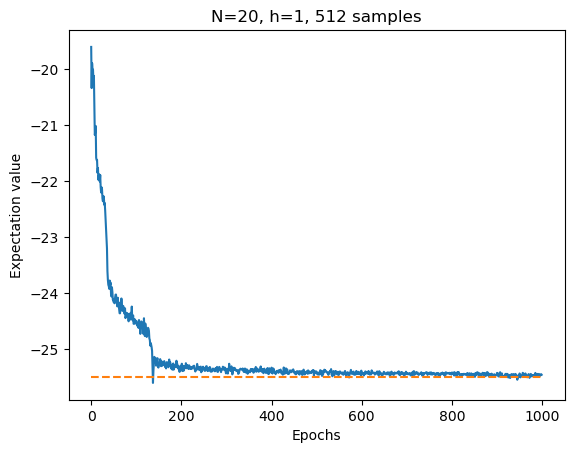

In [7]:
plt.plot(epochs, energy_data)
plt.plot([0, 1000], [lib.ground_state_energy(1, 20)] * 2, linestyle = '--')
plt.title('N=20, h=1, 512 samples')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

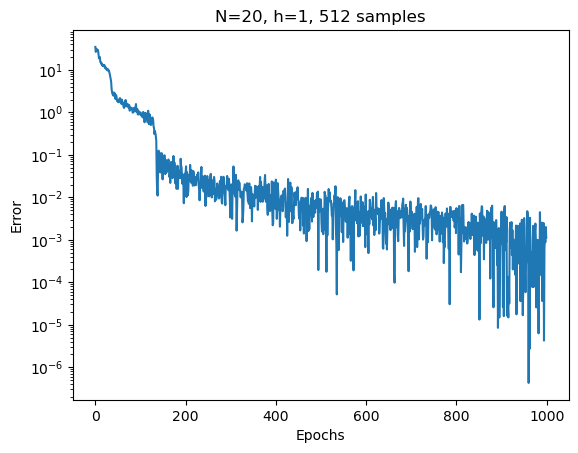

In [9]:
err = (np.array(energy_data) - lib.ground_state_energy(1, 20)) ** 2
plt.plot(epochs, err)
plt.title('N=20, h=1, 512 samples')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.yscale('log')
plt.show()

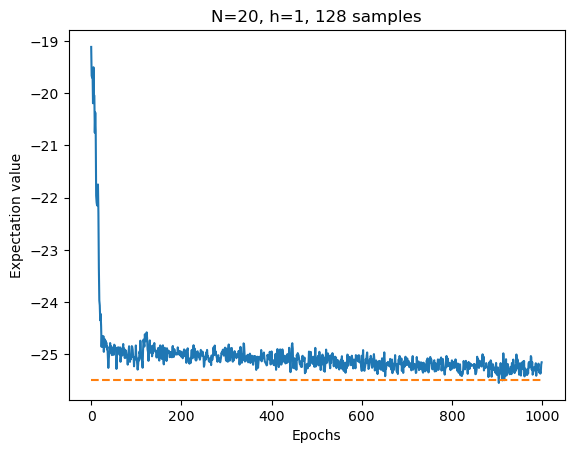

In [10]:
with open('data/zhuo_log_n20_128.txt') as f:
    lines = f.readlines()
energy_data128 = []
epochs = [n for n in range(1000)]
for i in range(1, len(lines)):
    line = lines[i]
    start = line.find('(') + 1
    end = line.find(')')
    # print(line[start:end])
    energy = np.complex128(line[start:end]).real
    energy_data128.append(energy)

plt.plot(epochs, energy_data128)
plt.plot([0, 1000], [lib.ground_state_energy(1, 20)] * 2, linestyle = '--')
plt.title('N=20, h=1, 128 samples')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

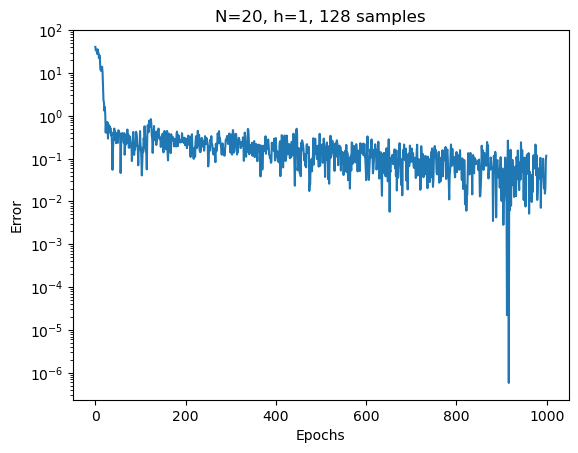

In [17]:
err128 = (np.array(energy_data128) - lib.ground_state_energy(1, 20)) ** 2
plt.plot(epochs, err128)
plt.title('N=20, h=1, 128 samples')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.yscale('log')
plt.show()

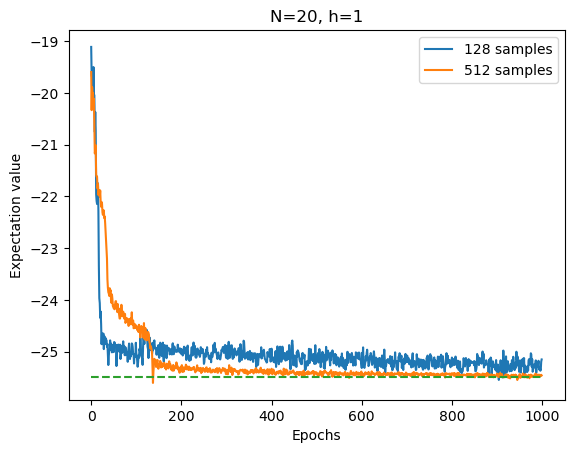

In [13]:
plt.plot(epochs, energy_data128, label='128 samples')
plt.plot(epochs, energy_data, label='512 samples')
plt.plot([0, 1000], [lib.ground_state_energy(1, 20)] * 2, linestyle = '--')
plt.title('N=20, h=1')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.legend(loc='best')
plt.show()

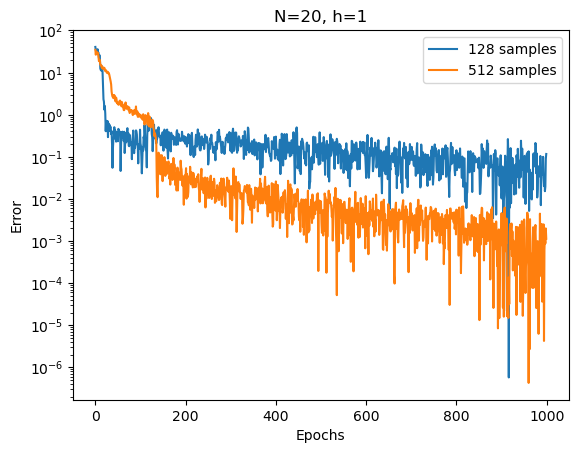

In [16]:
plt.plot(epochs, err128, label='128 samples')
plt.plot(epochs, err, label='512 samples')
# plt.plot([0, 1000], [lib.ground_state_energy(1, 20)] * 2, linestyle = '--')
plt.title('N=20, h=1')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [25]:
np.array(energy_data[200:]).std()

np.float64(0.04492442972760301)

In [26]:
np.array(energy_data128[200:]).std()

np.float64(0.12646537759124238)

In [27]:
import pickle
with open('data/grad_comparisons_data.p', 'rb') as fp:
    data = pickle.load(fp)

In [33]:
np.array(data[(10, 1, 'SGD', 'manual with values')])[100:200].std()

np.float64(0.016819186079013504)

In [35]:
np.array(data[(20, 1, 'SGD', 'manual with list')])[100:].std()

np.float64(0.6738668749799019)